In [1]:
import numpy as np

import pandas as pd
import networkx as nx 

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: openpyxl in c:\users\ana\appdata\local\programs\python\python310\lib\site-packages (3.1.5)



You should consider upgrading via the 'C:\Users\Ana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
ensayo3_excel=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
ensayo4_excel=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
coordenadas_csv=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

In [3]:
ensayo3_dict=pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0) ## shetname= none lee todas las hojas
ensayo4_dict=pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0) 

In [4]:
##si yo tengo 109 data frames en un diccionario , con funcion llamarlo
ensayos3_dfs=lista_dfs(ensayo3_dict)
ensayos4_dfs=lista_dfs(ensayo4_dict)

#FILTRADO DE MATRICES 

In [5]:
##vamos apilar las 109 en una sola matriz
## vamos a ver como se comporta con este umbral, tratar de inferir estos umbrales con estadisticos 
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.4, 0.7)

<Axes: >

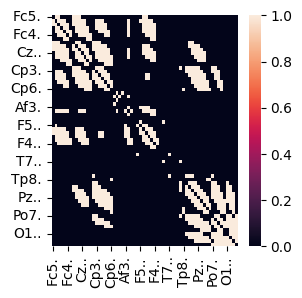

In [6]:
# Matriz binarizada 
plt.figure(figsize=(3,3))
sns.heatmap(resultado3_df)

## GENERAR ESTADISTICAS PARA DECIDIR UMBRALES

#los que vamos a probar 
- th25
- th50
- th75
- promedio
- varianza


si todo los sujetos se comportan de la misma manera deberia esperar lineas similares
            entonces el promedio lo describe bien
    comportamiento erratico --> promedio no es tan bueno

varianza pequeña --> comportamiento estable 

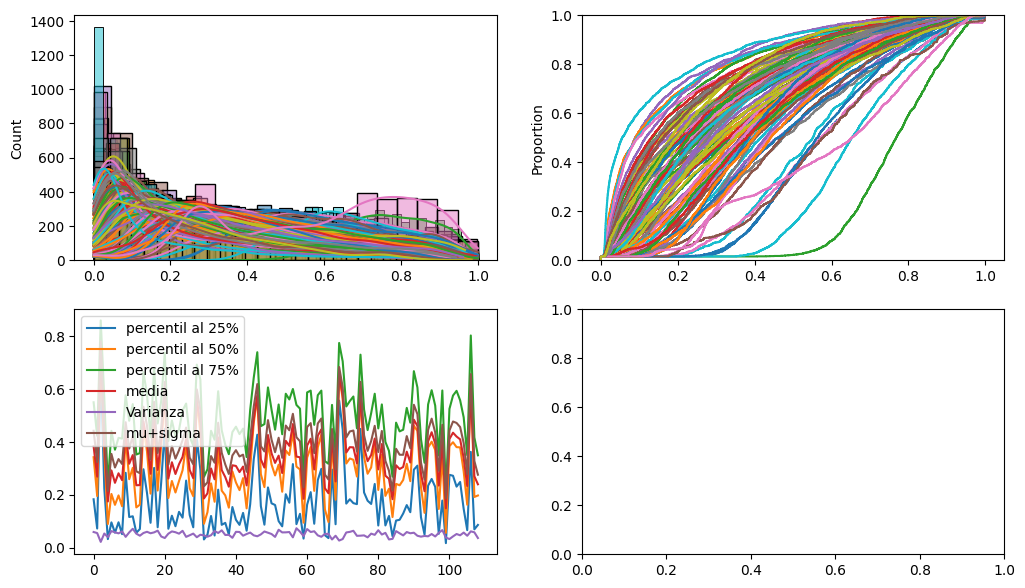

In [7]:
ensayos_dfs= ensayos3_dfs

th25, th50, th75, promedio, varianza= [],[],[],[],[]
mu_sigma=[]  ## umbral muy duro
fig,axes= plt.subplots(2,2, figsize=(12,7))
for sujeto in ensayos_dfs:
    ## calculos estadisticos 
    data=sujeto.stack().values
    th25.append(np.percentile(data,25))
    th50.append(np.percentile(data,50))
    th75.append(np.percentile(data,75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data)+np.var(data))

## plot de los 109 histogramas y los 109 distribuciones acumuladas 
    sns.histplot(sujeto.stack().values,ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values,ax=axes[0][1])

axes[1][0].plot(th25,label="percentil al 25%")
axes[1][0].plot(th50,label="percentil al 50%")
axes[1][0].plot(th75,label="percentil al 75%")
axes[1][0].plot(promedio,label="media")
axes[1][0].plot(varianza,label="Varianza")
axes[1][0].plot(mu_sigma,label="mu+sigma")
axes[1][0].legend()

In [8]:

estadisticos= pd.DataFrame(columns=["th25", "th50", "th75", "promedio", "varianza"], index=["min", "max", "media", "percentil30"])
columnas=[th25, th50, th75, promedio, varianza]
minimos=[]
maximos=[]
media=[]
perc30=[]
for lista in columnas:
    a=min(lista)
    minimos.append(a)
    b=max(lista)
    maximos.append(b)
    medias= np.mean(lista)
    media.append(medias)
    perc=np.percentile(lista, 30)
    perc30.append(perc)
    
estadisticos.loc["min"]=minimos
estadisticos.loc["max"]=maximos
estadisticos.loc["media"]=media
estadisticos.loc["percentil30"]=perc30
estadisticos

,th25,th50,th75,promedio,varianza
min,0.016915,0.055561,0.210152,0.148728,0.021637
max,0.68082,0.768026,0.859416,0.758803,0.073265
media,0.171176,0.300271,0.495304,0.350497,0.050874
percentil30,0.089362,0.215682,0.429064,0.288223,0.045046


In [ ]:
### porpuesta de umbrales, mandar a llamar una sola funcion que contenga toda la info 
## vamos a encapusar toda una linea de codigo en una sola, que variables vamos a querer cambiar 

Text(0.5, 1.0, 'umbral=0.2, población>60%')

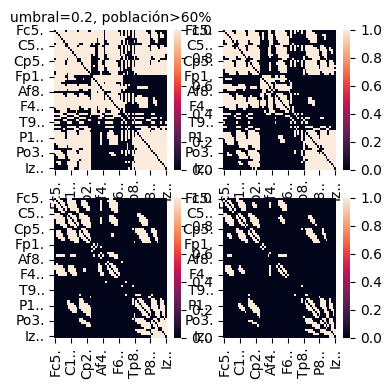

In [16]:
## EVALUAR ESTADISTICOS
resultados3_df=capsula(ensayos_dfs,0.2,0.6)
resultados3_df2=capsula(ensayos_dfs,0.3,0.6)
resultados3_df3=capsula(ensayos_dfs,0.5,0.6)
resultados3_df4=capsula(ensayos_dfs,0.6,0.6)


fig,axes =plt.subplots(2,2, figsize=(4,4))
sns.heatmap(resultados3_df, ax=axes[0,0])
sns.heatmap(resultados3_df2, ax=axes[0,1])
sns.heatmap(resultados3_df3, ax=axes[1,0])
sns.heatmap(resultados3_df4, ax=axes[1,1])
axes[0,0].set_title("umbral=0.2, población>60%", fontsize=10)

## ver activación en cierta zona en mapa 

Text(0.5, 1.0, 'umbral=0.3, población>50%')

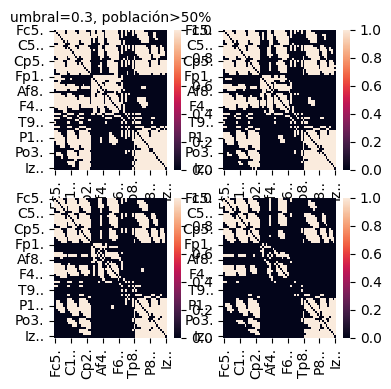

In [17]:
## moviendo porcentajes
resultados3_dfp=capsula(ensayos_dfs,0.3,0.5)
resultados3_dfp2=capsula(ensayos_dfs,0.3,0.6)
resultados3_dfp3=capsula(ensayos_dfs,0.3,0.7)
resultados3_dfp4=capsula(ensayos_dfs,0.3,0.8)


fig,axes =plt.subplots(2,2, figsize=(4,4))
sns.heatmap(resultados3_dfp, ax=axes[0,0])
sns.heatmap(resultados3_dfp2, ax=axes[0,1])
sns.heatmap(resultados3_dfp3, ax=axes[1,0])
sns.heatmap(resultados3_dfp4, ax=axes[1,1])
axes[0,0].set_title("umbral=0.3, población>50%", fontsize=10)

## ver activación en cierta zona en mapa 

Text(0.5, 1.0, 'umbral=0.2, población>60%')

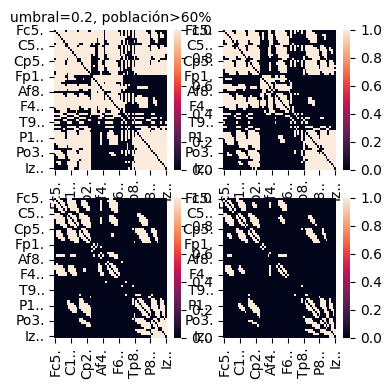

In [18]:
## EVALUAR ESTADISTICOS
resultados4_df=capsula(ensayos_dfs,0.2,0.6)
resultados4_df2=capsula(ensayos_dfs,0.3,0.6)
resultados4_df3=capsula(ensayos_dfs,0.5,0.6)
resultados4_df4=capsula(ensayos_dfs,0.6,0.6)


fig,axes =plt.subplots(2,2, figsize=(4,4))
sns.heatmap(resultados4_df, ax=axes[0,0])
sns.heatmap(resultados4_df2, ax=axes[0,1])
sns.heatmap(resultados4_df3, ax=axes[1,0])
sns.heatmap(resultados4_df4, ax=axes[1,1])
axes[0,0].set_title("umbral=0.2, población>60%", fontsize=10)


Text(0.5, 1.0, 'umbral=0.3, población>50%')

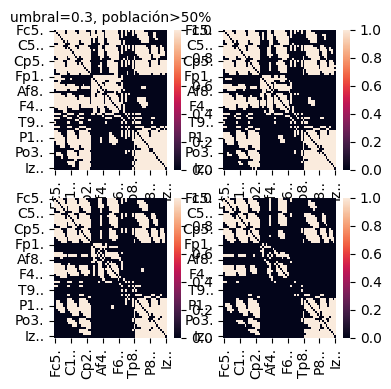

In [21]:
## moviendo porcentajes
resultados4_dfp=capsula(ensayos_dfs,0.3,0.5)
resultados4_dfp2=capsula(ensayos_dfs,0.3,0.6)
resultados4_dfp3=capsula(ensayos_dfs,0.3,0.7)
resultados4_dfp4=capsula(ensayos_dfs,0.3,0.8)


fig,axes =plt.subplots(2,2, figsize=(4,4))
sns.heatmap(resultados3_dfp, ax=axes[0,0])
sns.heatmap(resultados3_dfp2, ax=axes[0,1])
sns.heatmap(resultados3_dfp3, ax=axes[1,0])
sns.heatmap(resultados3_dfp4, ax=axes[1,1])
axes[0,0].set_title("umbral=0.3, población>50%", fontsize=10)

## GENERACION DE RESULTADOS
despues del analisis realizado, utilizando los mapas de calor, para poder escoger un umbral adecuado y un porcentaje de la población que cumpla dicho umbral; se porducerá a generar lo resultados.

Resultados a generar:
- grafo2D
- grafo3D
- Métricas de grafo
- Gráfico de comunidades con Hub

In [25]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultados3_dfp2)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultados4_dfp3)


In [26]:
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [28]:
# PLOT 3D

# construir dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop = True, inplace = True)

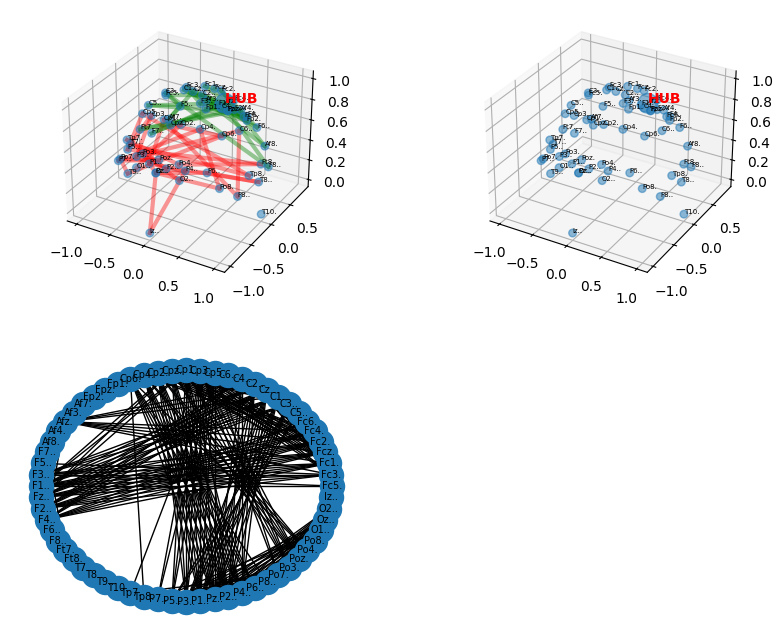

In [32]:

# Grafo de resultados para ensayo 3
hub3 = betwenness_3[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultados3_df3, axes[2])



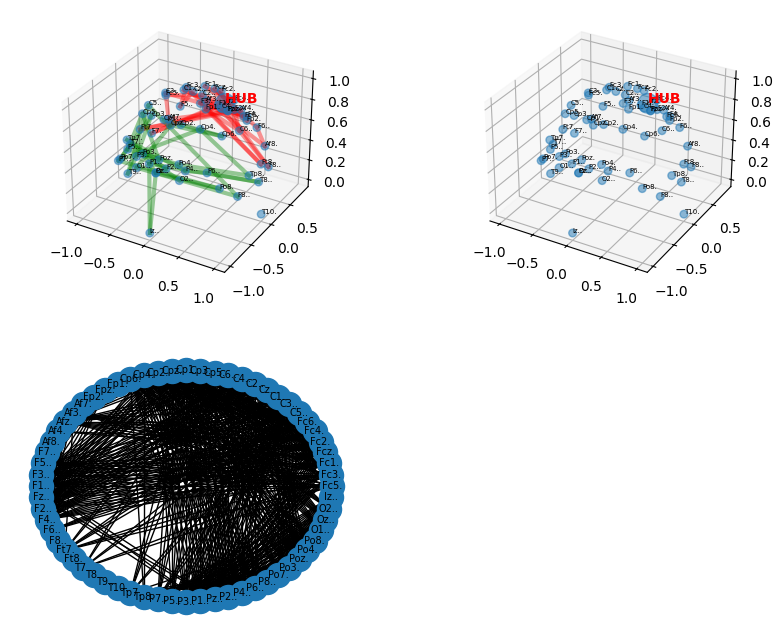

In [34]:
#  ensayo 4
hub = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultados4_dfp3, axes[2])

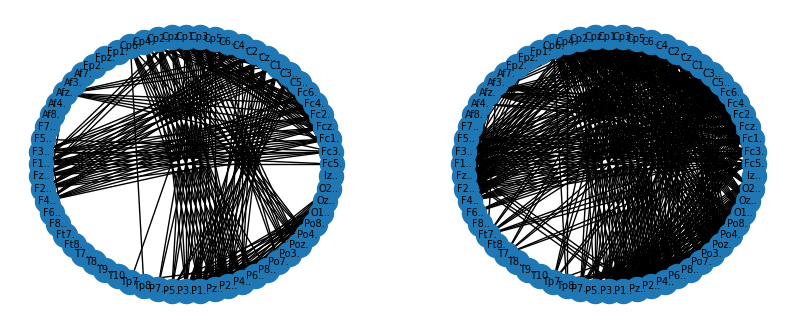

In [35]:
# Grafo2 para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultados3_df3, axes[0])
ensayo_grafo = grafo2D(resultados4_dfp3, axes[1])

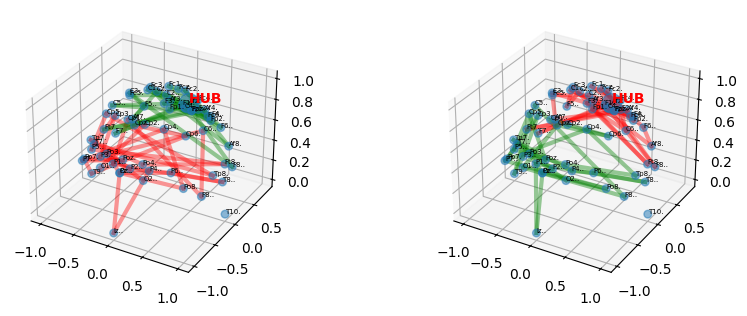

In [36]:
# Comunidades para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])

## EXAMEN ANA MADRIGAL / ENSAYO 5 Y 6 / 

In [38]:
#  dataset
ENSAYO5_EXCEL=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_exceL=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"

ensayo5_dict = pd.read_excel(ENSAYO5_EXCEL, sheet_name=None, index_col = 0)
ensayo6_dict = pd.read_excel(ensayo6_exceL, sheet_name=None, index_col = 0)

In [39]:
#  dataframes
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)

In [56]:
# compactar a una matriz
## despues de analisis se decidio el umbral y poblacion que aparece aqui

resultado5_df = capsula(ensayos5_dfs, 0.3, 0.7) 
resultado6_df = capsula(ensayos6_dfs, 0.4, 0.7)


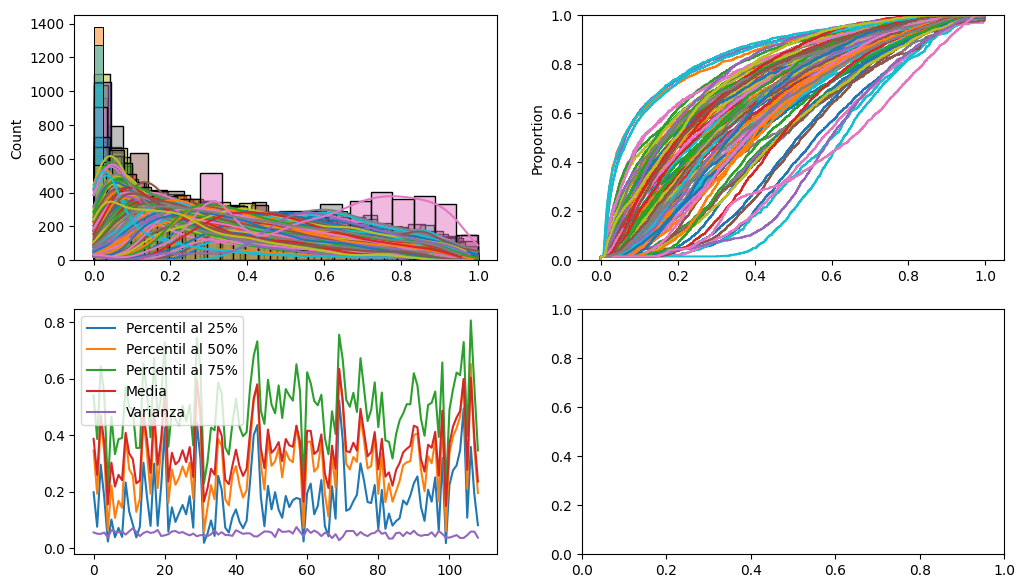

In [41]:
## ESTADISTICOS
#ENSAYO 5 ###########
ensayos_dfs5 = ensayos5_dfs
th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs5:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)  
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 5')

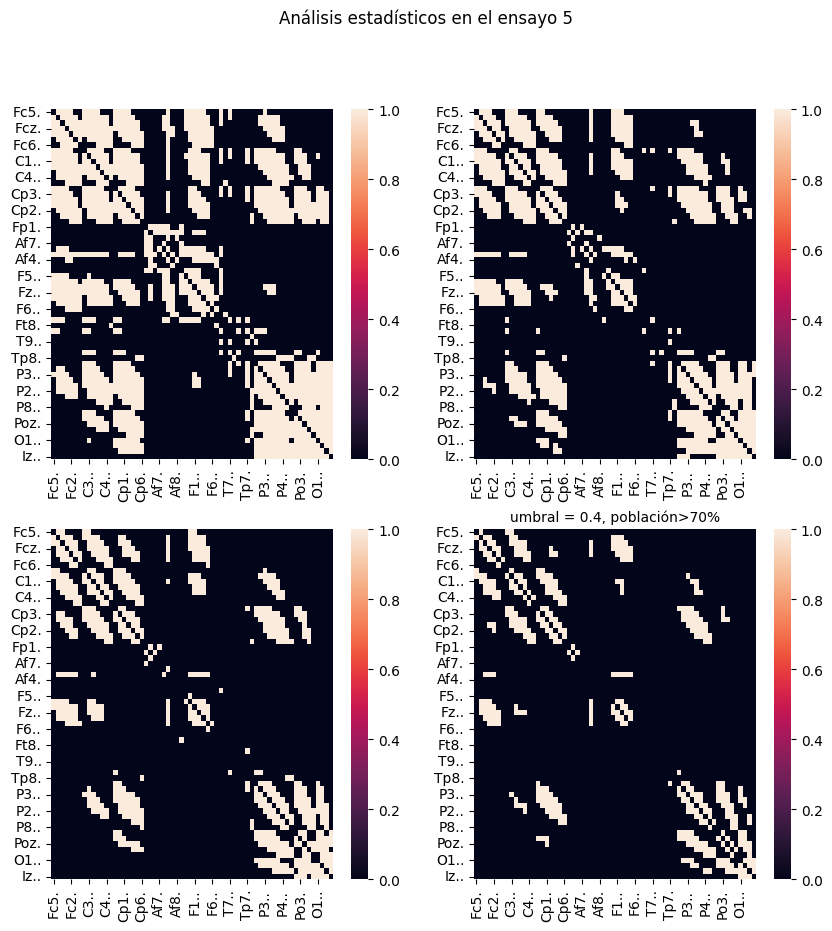

In [47]:
# comparativas entre valores de thresholds y población 

resultado5_df1 = capsula(ensayos5_dfs, 0.3, 0.7)
resultado5_df2 = capsula(ensayos5_dfs, 0.4, 0.7)  
resultado5_df3 = capsula(ensayos5_dfs, 0.5, 0.7)  
resultado5_df4 = capsula(ensayos5_dfs, 0.6, 0.7)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])
axes[1,1].set_title("probando umbrales, fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 5')

<Axes: >

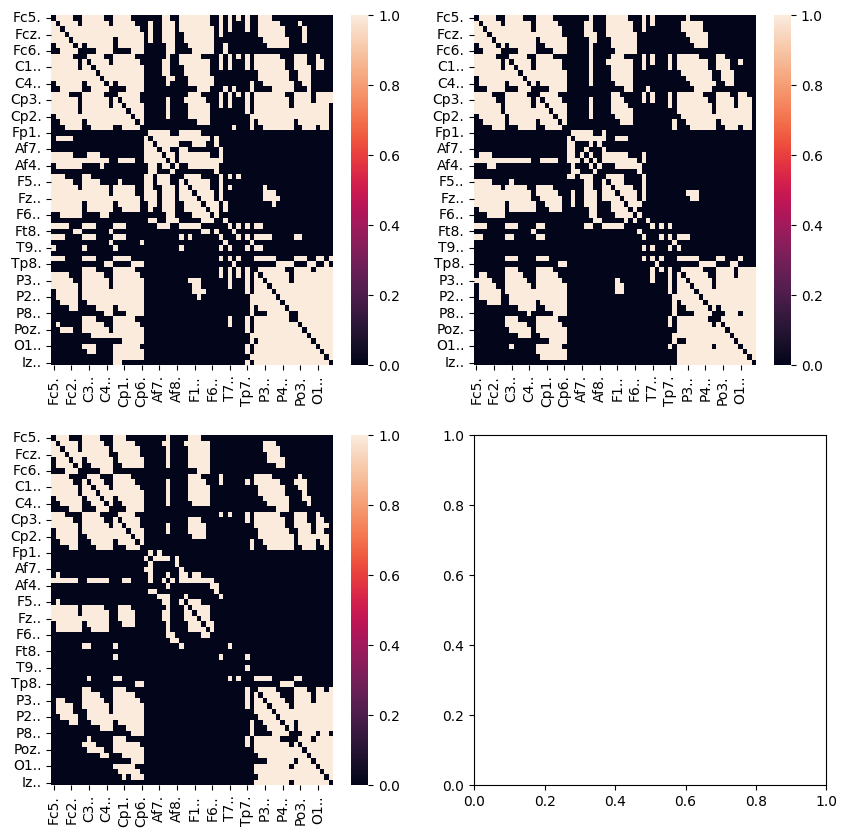

In [51]:
## PROBANDO UMBRAL 0.3 PARA DIF PORCENTAJES DE LA POBLACION 
resultado5_dfP1 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_dfP2 = capsula(ensayos5_dfs, 0.3, 0.7)  
resultado5_dfP3 = capsula(ensayos5_dfs, 0.3, 0.8)  


fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado5_dfP1, ax=axes[0, 0])
sns.heatmap(resultado5_dfP2, ax=axes[0, 1])
sns.heatmap(resultado5_dfP3, ax=axes[1, 0])


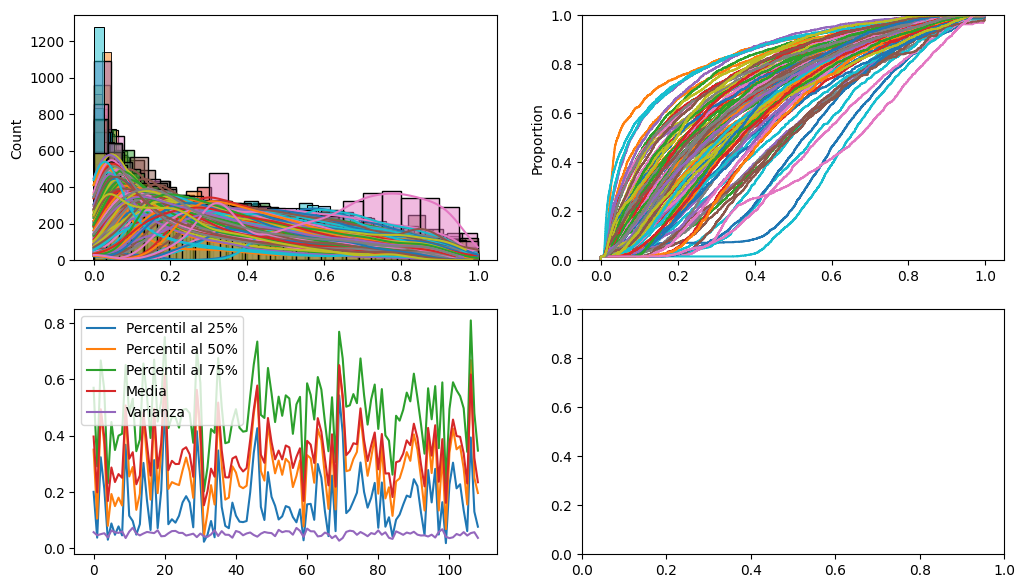

In [52]:
## PARA ENSAYO 6 

# Análisis para ensayo 6
ensayos_dfs6 = ensayos6_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs6:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 6')

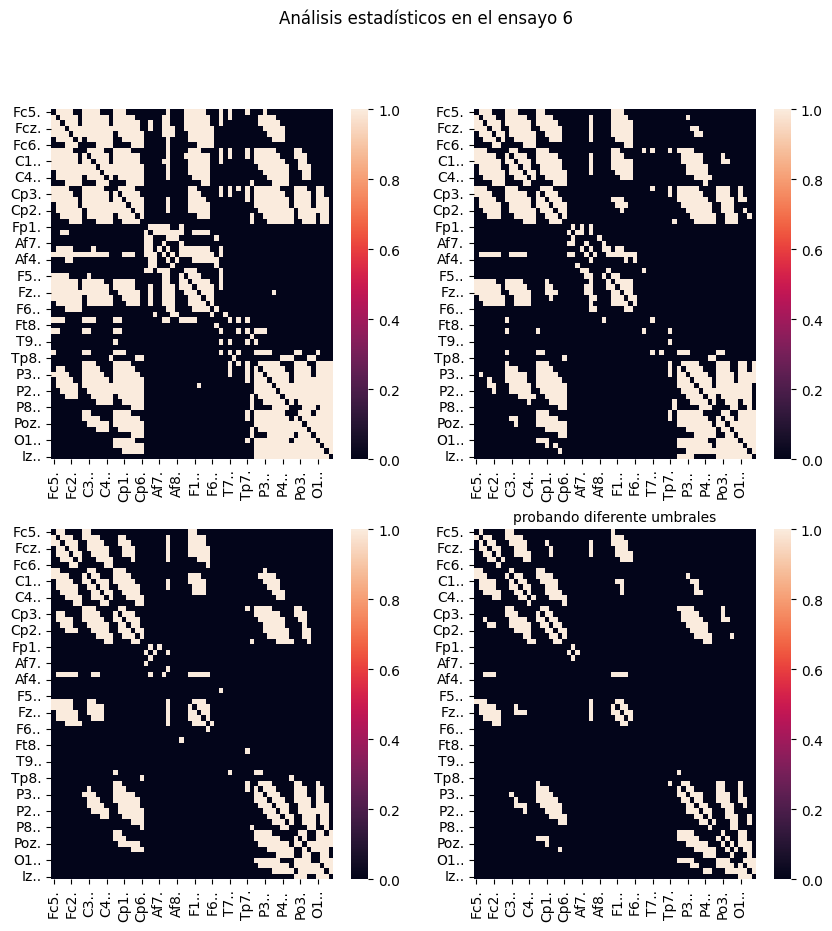

In [53]:
# comparativas entre valores de thresholds y población 

resultado6_df1 = capsula(ensayos6_dfs, 0.3, 0.7)
resultado6_df2 = capsula(ensayos6_dfs, 0.4, 0.7)  
resultado6_df3 = capsula(ensayos6_dfs, 0.5, 0.7)  
resultado6_df4 = capsula(ensayos6_dfs, 0.6, 0.7)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])
axes[1,1].set_title("probando diferente umbrales", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 6')

<Axes: >

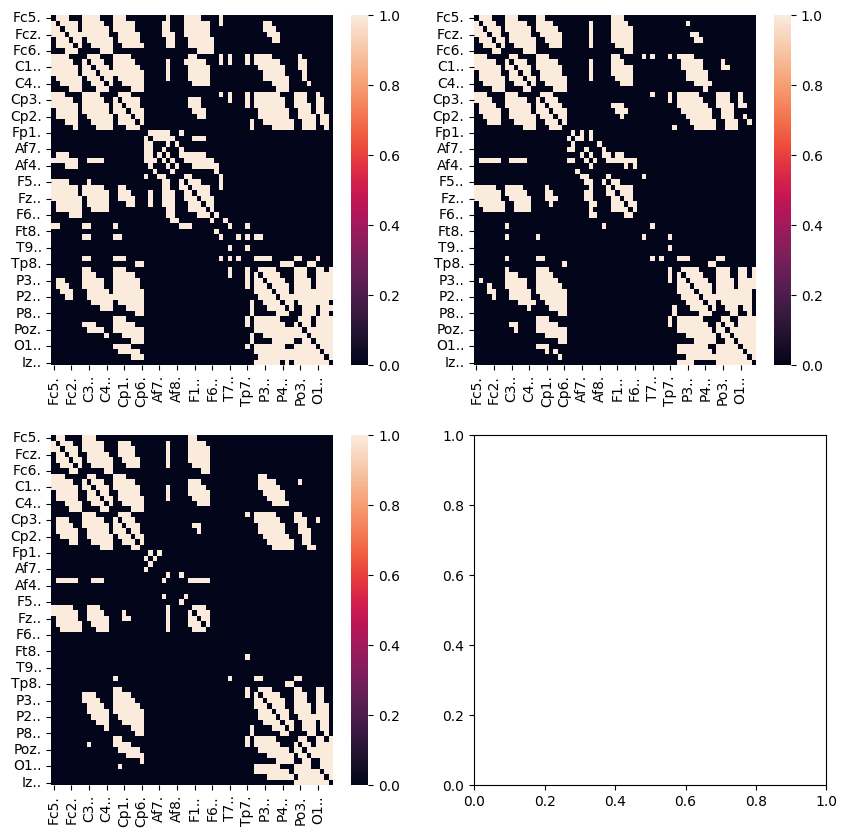

In [55]:
## selecionamos umbral 0.4 PARA DIF PORCENTAJES DE LA POBLACION 
resultado6_dfP1 = capsula(ensayos6_dfs, 0.4, 0.6)
resultado6_dfP2 = capsula(ensayos6_dfs, 0.4, 0.7)  
resultado6_dfP3 = capsula(ensayos6_dfs, 0.4, 0.8)  


fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado6_dfP1, ax=axes[0, 0])
sns.heatmap(resultado6_dfP2, ax=axes[0, 1])
sns.heatmap(resultado6_dfP3, ax=axes[1, 0])


In [58]:
## GENERACION DE RESULTADO
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_dfP2)
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df2)

In [59]:
# Cálculo de métricas por ensayo
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

('Afz.', 0.07373119766023696)


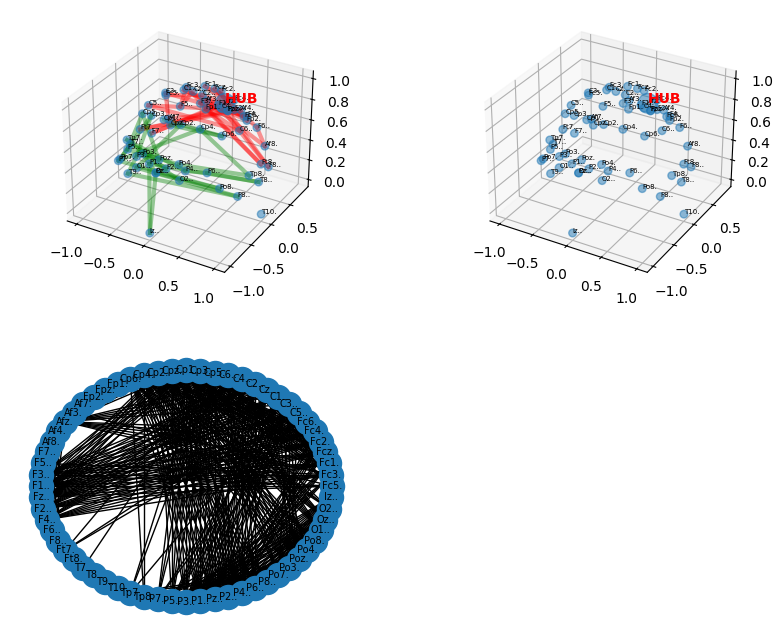

In [63]:
# Grafo ensayo 5
hub5 = betwenness_5[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_5, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub5, axes[1])
ensayo_grafo = grafo2D(resultado5_df2, axes[2])
print(hub5)

('Afz.', 0.14761166686678126)


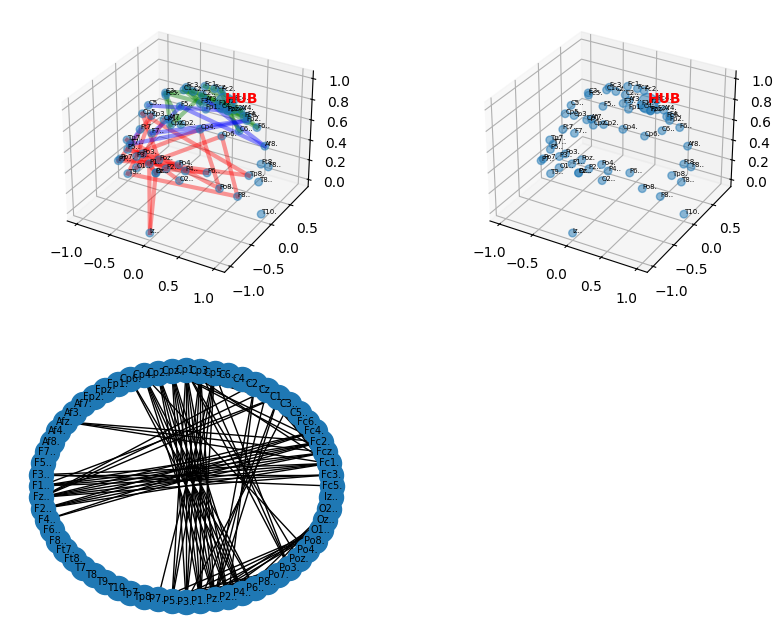

In [64]:
# Grafo de resultados para ensayo 6
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_6, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub6, axes[1])
ensayo_grafo = grafo2D(resultado6_df4, axes[2])
print(hub6)

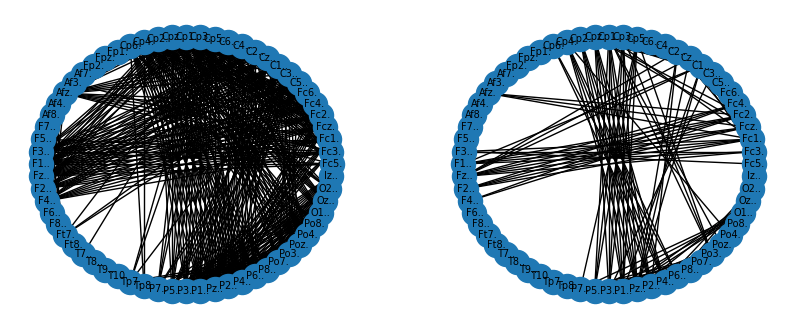

In [66]:
# Grafo 2d
hub5 = betwenness_5[0]
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado5_df2, axes[0])
ensayo_grafo = grafo2D(resultado6_df4, axes[1])

('Afz.', 0.07373119766023696)
('Afz.', 0.14761166686678126)


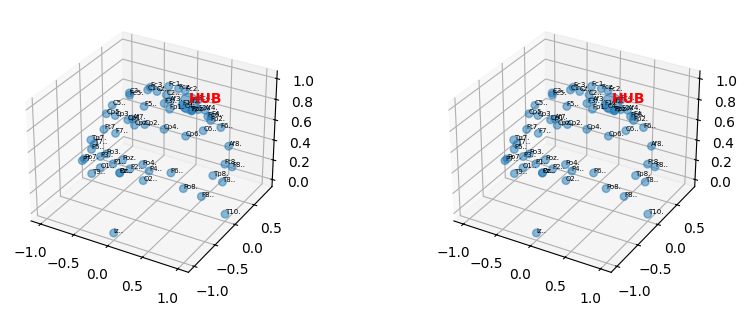

In [69]:

# Grafo 3d
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub5, axes[0])
grafo3D(eeg_coords, hub6, axes[1])
print(hub5)
print(hub6)

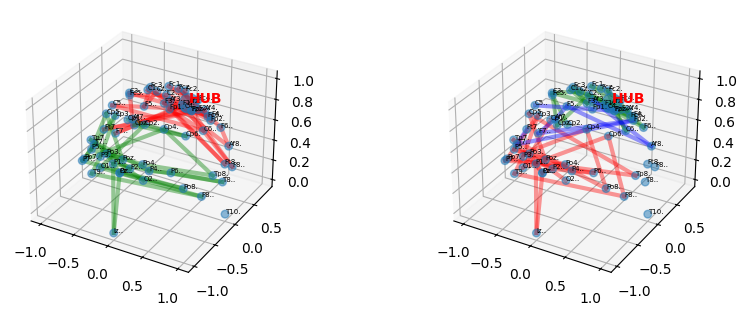

In [70]:

# Grafo de comunidades
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_5, hub5, eeg_coords, axes[0])
grafo_comunidades(communities_6, hub6, eeg_coords, axes[1])

In [84]:
communities_5


[frozenset({'Af3.',
            'Af4.',
            'Af7.',
            'Af8.',
            'Afz.',
            'C1..',
            'C2..',
            'C3..',
            'C4..',
            'C5..',
            'C6..',
            'Cz..',
            'F1..',
            'F2..',
            'F3..',
            'F4..',
            'F5..',
            'F6..',
            'F7..',
            'F8..',
            'Fc1.',
            'Fc2.',
            'Fc3.',
            'Fc4.',
            'Fc5.',
            'Fc6.',
            'Fcz.',
            'Fp1.',
            'Fp2.',
            'Fpz.',
            'Ft7.',
            'Ft8.',
            'Fz..'}),
 frozenset({'Cp1.',
            'Cp2.',
            'Cp3.',
            'Cp4.',
            'Cp5.',
            'Cp6.',
            'Cpz.',
            'Iz..',
            'O1..',
            'O2..',
            'Oz..',
            'P1..',
            'P2..',
            'P3..',
            'P4..',
            'P5..',
            'P6..'

In [83]:
communities_6


[frozenset({'Cp1.',
            'Cp3.',
            'Cp4.',
            'Cp5.',
            'Cp6.',
            'Iz..',
            'O1..',
            'O2..',
            'Oz..',
            'P1..',
            'P2..',
            'P3..',
            'P4..',
            'P5..',
            'P6..',
            'P7..',
            'P8..',
            'Po3.',
            'Po4.',
            'Po7.',
            'Po8.',
            'Poz.',
            'Pz..',
            'T9..',
            'Tp7.',
            'Tp8.'}),
 frozenset({'Af4.',
            'Afz.',
            'C1..',
            'C2..',
            'C3..',
            'C4..',
            'C6..',
            'Cp2.',
            'Cpz.',
            'Cz..',
            'F1..',
            'F2..',
            'F3..',
            'F4..',
            'F6..',
            'Fc1.',
            'Fc2.',
            'Fc3.',
            'Fc4.',
            'Fc5.',
            'Fc6.',
            'Fcz.',
            'Fz..'}),
 frozenset({'Af3

## CONCLUSION
- HUBS: Afz se consolida como un nodo crítico en ambas tareas, lo que sugiere que tanto la imaginación como la ejecución real requieren una mayor integración en áreas frontales. Al comparar los valores de degree centrality entre el Ensayo 5 (0.074) y el Ensayo 6 (0.148), se observa que en este último el nodo Afz está conectado a casi el doble de nodos. Esto indica que actúa como un hub más dominante durante la tarea imaginada, posiblemente debido al mayor esfuerzo cognitivo y a la mayor demanda de integración funcional que caracterizan a los procesos de imaginación motora.
- EN LAS COMUNIDADES:
el ensayo 5 (ejecución real) tiene 3 comunidades grandes y definidas, existe una separación clara entre fronto-central vs parieto-occipital
el ensayo 6 (imaginación) tiene 7 comunidades fragmentadas, hay una mayor dispersión. Posiblemente porque la ejecución real produce comunidades más grandes y definidas porque activa circuitos motores ya establecidos y especializados. En cambio, la imaginación motora requiere de un procesamiento  menos automático